In [3]:
import pandas as pd 
import numpy as np 

In [4]:
# go to github folder>data.scv>open raw>copy above link and paste below. 
file = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [5]:
!wget $file

--2025-10-27 17:23:06--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-10-27 17:23:07 (133 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



## DATA PREPARATION

In [6]:
df=pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [7]:
# format the column names 
 
df.columns=df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

#or 



,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [9]:
# or 

strings = list(df.dtypes[df.dtypes=='object'].index) #.index returns index type.

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

## EXPLORATORY DATA ANALYSIS

In [10]:
# looking for unique values per row. (the first 5)

for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique())
    

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
[2011 2012 2013 1992 1993]
28
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
[335. 300. 230. 320. 172.]
356
[ 6.  4.  5.  8. 12.]
9
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
[ 2.  4.  3. nan]
3
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
['compact' 'midsize' 'large']
3
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
[26 28 27 25 24]
59
[19 20 18 17 16]
69
[3916 3105  819  617 1013]
48
[46135 40650 36350 29450 34500]
6049


In [11]:
# distribution of price - to analyze price data

import matplotlib.pyplot as plt 
import seaborn as sns
# to make sure the plots can be displayed in the book - for rendering the figures instead of dumping their 'object'/type
%matplotlib inline 

<Axes: xlabel='msrp', ylabel='Count'>

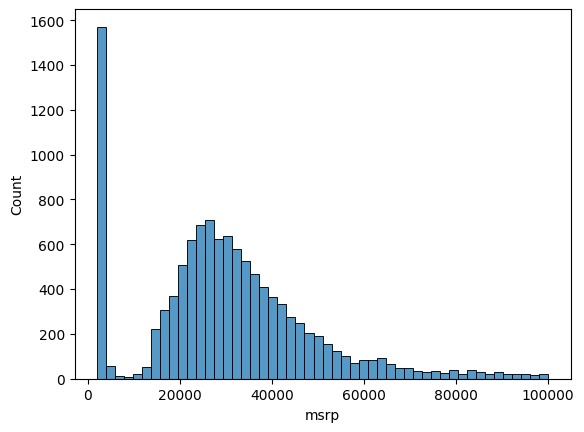

In [12]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

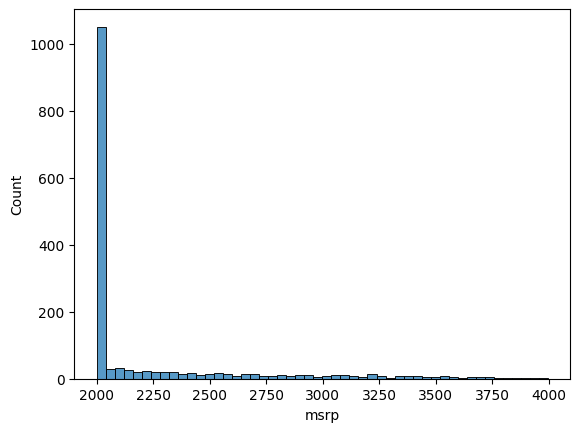

In [13]:
# the e6 represents 10^6 - so monst cars are priced withing the 0.5m range

sns.histplot(df.msrp[df.msrp<4000], bins=50)

In [14]:
np.log([0+1,1+1,10+1,1000+1,100000+1])

np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
# normal distribution of out price/msrp graph!! - using log or log1p (the latter used to avoid infinites)
price_logs=np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

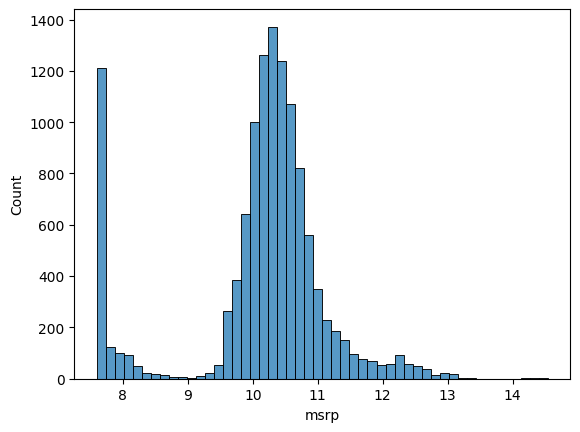

In [16]:

sns.histplot(price_logs,bins=50)

In [17]:
# missing valuess!
print(df.isna().sum())
df[df.isna().any(axis=1)]

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
87,nissan,200sx,1996,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,26,2009,2000
88,nissan,200sx,1996,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,26,2009,2000
91,nissan,200sx,1997,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
92,nissan,200sx,1997,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
93,nissan,200sx,1998,regular_unleaded,115.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,subaru,xt,1991,regular_unleaded,145.0,6.0,manual,all_wheel_drive,2.0,NaN,compact,coupe,23,16,640,2000
11809,toyota,yaris_ia,2017,regular_unleaded,106.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,39,30,2031,15950
11810,toyota,yaris_ia,2017,regular_unleaded,106.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,40,32,2031,17050
11867,gmc,yukon,2015,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,21,15,549,64520


## SETTING UP A VALIDATION FRAMEWORK 

In [18]:
# before accounting for missing values we need to validate!

# setting up a validation framework - 20% of the dataset

n=len(df)
n_val=int(n*0.2)
n_test=n_val
n_train=int(n*0.6) #this will lead to a small diff because int() rounds off.  
print(n_val + n_test + n_train)
print(n)

11912
11914


In [19]:
n_train = n - (n_val + n_test)
print(n_val + n_test + n_train)
print(n)

11914
11914


In [20]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [21]:
val = df.iloc[0:n_val]


In [22]:
test = df.iloc[n_val:n_val+n_test]


In [23]:
# now you notice that the datasets are ordered by their make - so you want to shuffle them

#logically defining by train first. 

In [24]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [25]:
np.random.seed(2) # to make sure it doesn't generate diff datasets at each shuffle run
np.random.shuffle(idx)

In [26]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [27]:
idx[n_train:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336], shape=(4764,))

In [28]:
train = df.iloc[idx[:n_train]]
val = df.iloc[idx[n_train:n_train+n_val]]
test = df.iloc[idx[n_train+n_val:]]

In [29]:
len(train), len(val), len(test)

(7150, 2382, 2382)

In [30]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
val=val.reset_index(drop=True)

In [31]:
y_train=np.log1p(train.msrp.values)
y_test=np.log1p(test.msrp.values)
y_val=np.log1p(val.msrp.values)

In [32]:
del train['msrp'] # can't use train.msrp - wrong syntax here. 
del test['msrp'] 
del val['msrp'] 

# if we have the value we're trying to predict as a feature - our prediction will be 100% accurate.

## LINEAR REGRESSION

In [33]:
train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [34]:
# so, let's consider hp, miles per gallon (mpg) and popularity

# [453, 11, 86]

# i = 10, for x of i 


In [35]:
xi=[453, 11, 86] # choosing 3 characteristic 

In [36]:
def g(xi): # skeletal function of a regression model.  
    # do something 
    return 10000

In [37]:
# check notes to understand formula. 

w0 = 7.17 # bias term
w = [0.01,0.04,0.002] # weights of each characteristic 

In [38]:
def linear_regression(xi):
    n = len(xi) # len of feature vector 
    pred = w0
    for j in range(n):
        pred = pred + (w[j]*xi[j])
    return pred 
    

In [39]:
linear_regression(xi)

12.312

In [40]:
# the output is log - so to undo it, we must do exponent

In [41]:
np.exp(12.312) - 1 # we do -1 to undo the +1 we did inside the log

np.float64(222347.2221101062)

In [42]:
# or 
np.expm1(12.312)

np.float64(222347.2221101062)

In [43]:
np.log1p(222347.2221101062)

np.float64(12.312)

## LINEAR REGRESSION: VECTOR FORM

In [44]:
def dot(xi, w):
     n = len(xi)
     res = 0.0 
     for j in range(n):
         res = res + xi[j]*w[j]
     return res

def linear_regression(xi):
    return w0 + dot(xi,w)
    

In [45]:
[1] + [1,2,3]

[1, 1, 2, 3]

In [46]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [47]:
def linear_regression(xi):
    xi = [1] + xi                  # because we do w0 + w1xi1 + w2xi2 .... 
                                   # which would mean that w0's coefficient (x0) is 1, 
                                   # that's why we add [1] to the x vector. 
    return w0 + dot(xi,w_new)

In [48]:
w

[0.01, 0.04, 0.002]

In [49]:
linear_regression(xi) # the output is the same. 

19.482

In [50]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

X = [x1,x2,x10]
X = np.array(X)

In [51]:
w0 = 7.17 
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [52]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [53]:
def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

## TRAINING A LINEAR REGRESSION MODEL

In [54]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [55]:
def train_linear_regression(X,y):
    pass

X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

We're implmenting w=(X<sup>t</sup>X)<sup>-1</sup>X<sup>t</sup>y

In [56]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
X=np.column_stack([ones,X])

In [58]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [59]:
y = [10000,20000,15000,25000,10000,20000,15000,25000,12000]

In [60]:
XTX = X.T.dot(X) # .T is built in - and returns the transpose of X

In [61]:
X.T.dot(X)

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [62]:
XTX_inv = np.linalg.inv(XTX)

In [63]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [64]:
w_full = XTX_inv.dot(X.T).dot(y)

In [65]:
w0 = w_full[0]
w = w_full[1:]

In [66]:
w0, w

(np.float64(30006.77669255562),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [67]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]
]
X = np.array(X)

In [68]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [69]:
train_linear_regression(X,y)

(np.float64(30006.77669255562),
 array([ -22.77425287, -257.69412959,   -2.3012064 ]))

## CAR PRICE BASELINE MODEL 

In [70]:
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [71]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [72]:
X_train=train[base].values
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [73]:
## nan because there are some missing values in base columns 

train[base].isna().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [74]:
X_train=train[base].fillna(0)

g(xi) = w0 + xi1w1 + xi2w2....

so if xi is 0 (we've filled nulls with 0) - then the term xi1w1 is 0 - i.e the term disappears. (where xi is one car i)

In [75]:
w0,w=train_linear_regression(X_train,y_train)

In [76]:
y_pred = w0+X_train.dot(w)

<Axes: ylabel='Count'>

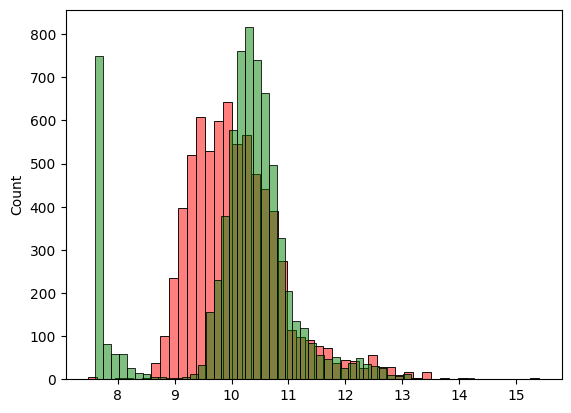

In [77]:
sns.histplot(y_pred,color='red',bins=50,alpha=0.5)
sns.histplot(y_train,color='green',bins=50,alpha=0.5)

It seems that there's a diff between predicted and actual values.
The former is less than the latter. 

## ROOT MEAN SQUARE ERROR - RMSE

(y_pred - y_train)<sup>2</sup>

[g(xi)-yi]<sup>2</sup>

the output array will be out SQUARED ERROR

the average will be sum of all differences/count(features)

then we compute the sq root of it



In [78]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse 

rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## COMPUTING RMSE ON VALIDATION DATASET 


In [79]:
def prepare_X(df):
    df_num=df[base]
    df_num=df_num.fillna(0)
    X = df_num.values
    return X 

In [80]:
X_train = prepare_X(train)
w0, w = train_linear_regression(X_train, y_train)

# Validation Set 

X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)


np.float64(0.7616530991301627)

## FEATURE ENGINEERING

In [81]:
2017 - train.year.max()

np.int64(0)

In [82]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num=df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X 

In [83]:
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [84]:
X_train = prepare_X(train)
X_train #the last column is age feature

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [85]:
w0,w=train_linear_regression(X_train,y_train)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5172055461058327)

#### AS WE CAN SEE, IN VALIDATION DATASET NOW - THE RMSE IS SMALLER THAN BEFORE WITH TRAIN DATASET 

<Axes: ylabel='Count'>

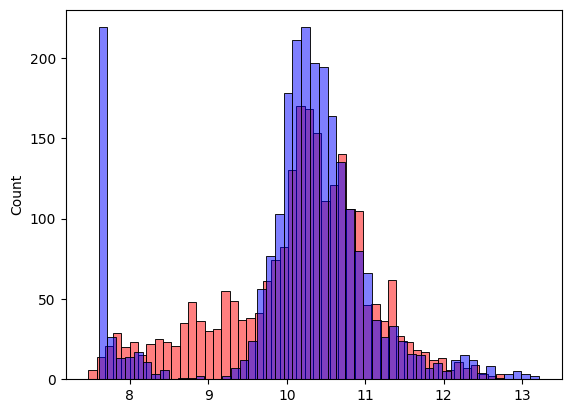

In [86]:
sns.histplot(y_pred,color='red',bins=50,alpha=0.5)
sns.histplot(y_val,color='blue',bins=50,alpha=0.5)

## CATEGORICAL VARIABLES

In [87]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [88]:
for i in [2,3,4]:
    train['num_doors_%s' % i] = (train.number_of_doors == i).astype(int)

In [89]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for i in [2,3,4]:
        df['num_doors_%s' % i] = (df.number_of_doors == i).astype('int')
        features.append('num_doors_%s' % i)
    
    df_num=df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X 

In [90]:
X_train = prepare_X(train)
w0,w=train_linear_regression(X_train,y_train)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5157995641501902)

#### very slightly improved 

In [91]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [92]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')

    for i in [2,3,4]:
        df['num_doors_%s' % i] = (df.number_of_doors == i).astype(int)
        features.append('num_doors_%s' % i)

    for i in makes:
        df['makes_%s' % i] = (df.make == i).astype(int)
        features.append('makes_%s' % i)
    
    df_num=df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X 

In [93]:
X_train = prepare_X(train)
w0,w=train_linear_regression(X_train,y_train)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5076038849556633)

#### very small difference, again

In [94]:
train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [95]:
categorical_variables = ['make','engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style']

In [96]:
makes = list(train.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [97]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [98]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [99]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')

    for i in [2,3,4]:
        df['num_doors_%s' % i] = (df.number_of_doors == i).astype(int)
        features.append('num_doors_%s' % i)
        
    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c]== v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num=df[features]
    df_num=df_num.fillna(0)
    X = df_num.values
    
    return X 

In [100]:
X_train = prepare_X(train)
w0,w=train_linear_regression(X_train,y_train)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(20.255338567164987)

## REGULARIZATION 

In [105]:
def train_linear_regression_reg(X,y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [106]:
X_train = prepare_X(train)
w0,w=train_linear_regression_reg(X_train,y_train, r=0.01)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.4565219901066027)

## TUNING THE MODEL 

In [107]:
for r in [0.0,0.000001, 0.001, 0.1, 1,10]:
    X_train = prepare_X(train)
    w0,w=train_linear_regression_reg(X_train,y_train,r=r)
    X_val = prepare_X(val)
    y_pred = w0 + X_val.dot(w)
    
    final_rmse=rmse(y_val,y_pred)
    print(r, w0, final_rmse)
    

0.0 150710170147060.28 20.255338567164987
1e-06 -93.62054335603462 0.4565170482310729
0.001 6.285496210990604 0.4565175088332509
0.1 6.1912086909259 0.45656927630050337
1 5.634896668332636 0.457220431799526
10 4.283980108969942 0.47014569321004196


In [109]:
r = 0.001
X_train = prepare_X(train)
w0,w=train_linear_regression_reg(X_train,y_train,r=r)
X_val = prepare_X(val)
y_pred = w0 + X_val.dot(w)
score=rmse(y_val,y_pred)
score

np.float64(0.4565175088332509)

#### we selected the best regularization parameter and we trained our model with it. and we see that it works on the validation dataset

In [ ]:
##